In [3]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "NanumGothicCoding"
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
from plotnine import *
import missingno as msno
%matplotlib inline

공공 데이터 상권 정보 분석하기 => https://www.data.go.kr/dataset/15012005/fileData.do

In [9]:
# 2016년 상권별 업종밀집 통계 => 상권별 밀집도를 보여준다.
# read_csv() 메소드 encoding 속성의 기본값은 'utf-8' 이다. 'utf-8'로 읽어오지 못한다면 encoding 속성값을 'euc-kr', 'cp949',
# 'ms949'로 변경해서 사용한다.
shop = pd.read_csv('./data/shop_2016.csv', encoding='ms949')
shop

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
0,강릉역광장_2,2523,201601,소매,가전제품소매,1.0818
1,구미역_3,1149,201601,소매,가전제품소매,0.8865
2,전북 전주시 중화산1동_1,768,201601,소매,가전제품소매,1.1757
3,충청북도청_2,1309,201601,소매,가전제품소매,0.3574
4,충북 청주시 복대1동_1,1311,201601,소매,가전제품소매,0.6849
...,...,...,...,...,...,...
805676,경남 양산시 덕계동_1,626,201612,소매,NaN,1.2906
805677,경북 구미시 신평1동_2,1143,201612,업종분류불능,NaN,0.5677
805678,안양역_5,1663,201612,소매,NaN,1.6597
805679,양산역,616,201612,소매,NaN,1.4103


In [12]:
shop_2018_06 = pd.read_csv('./data/shop_201806_01.csv', encoding='euc-kr')
shop_2018_06.shape

(499328, 39)

In [13]:
shop_2018_06.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [14]:
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [16]:
# 분석 작업에 필요한 column 만 추려낸다.
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
               '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_2018_06[view_columns].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로 71,127.104071,37.500249


In [17]:
shop_2018_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

<AxesSubplot:>

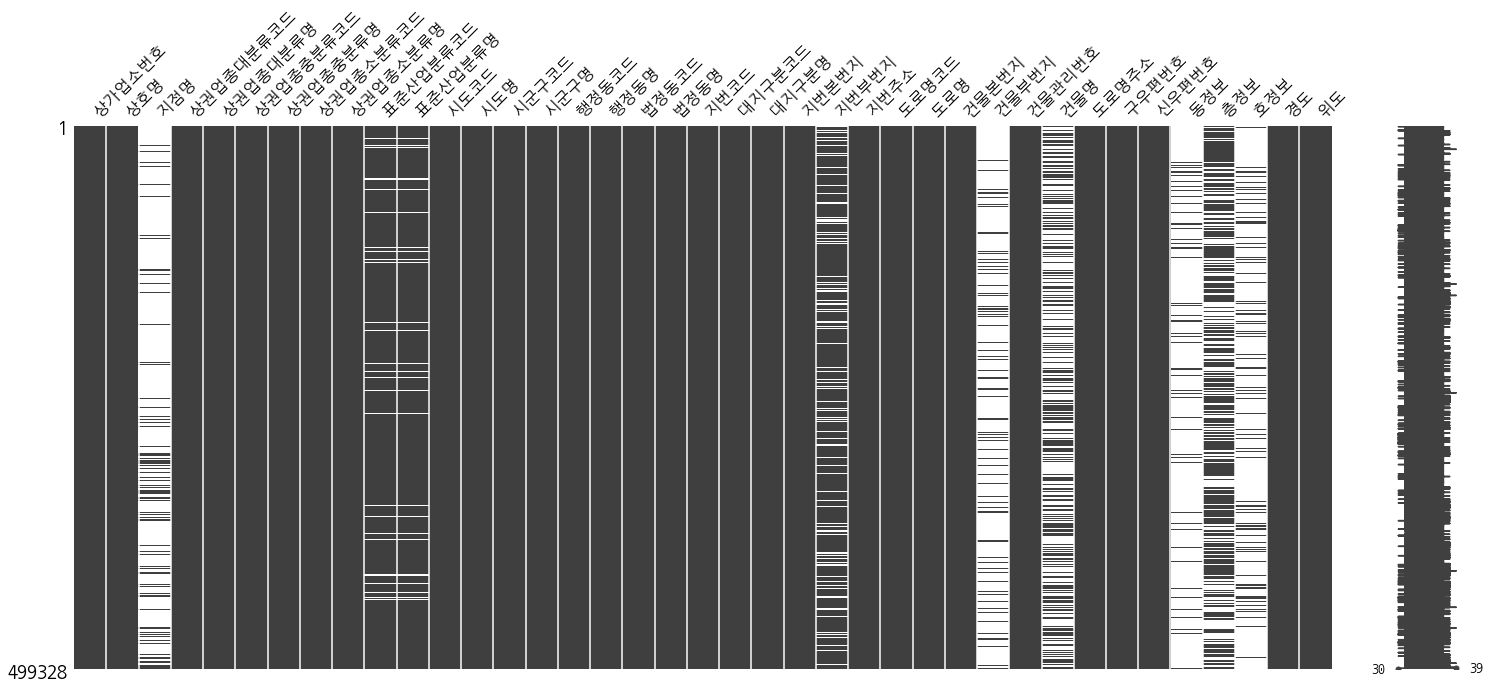

In [18]:
msno.matrix(shop_2018_06)

<AxesSubplot:>

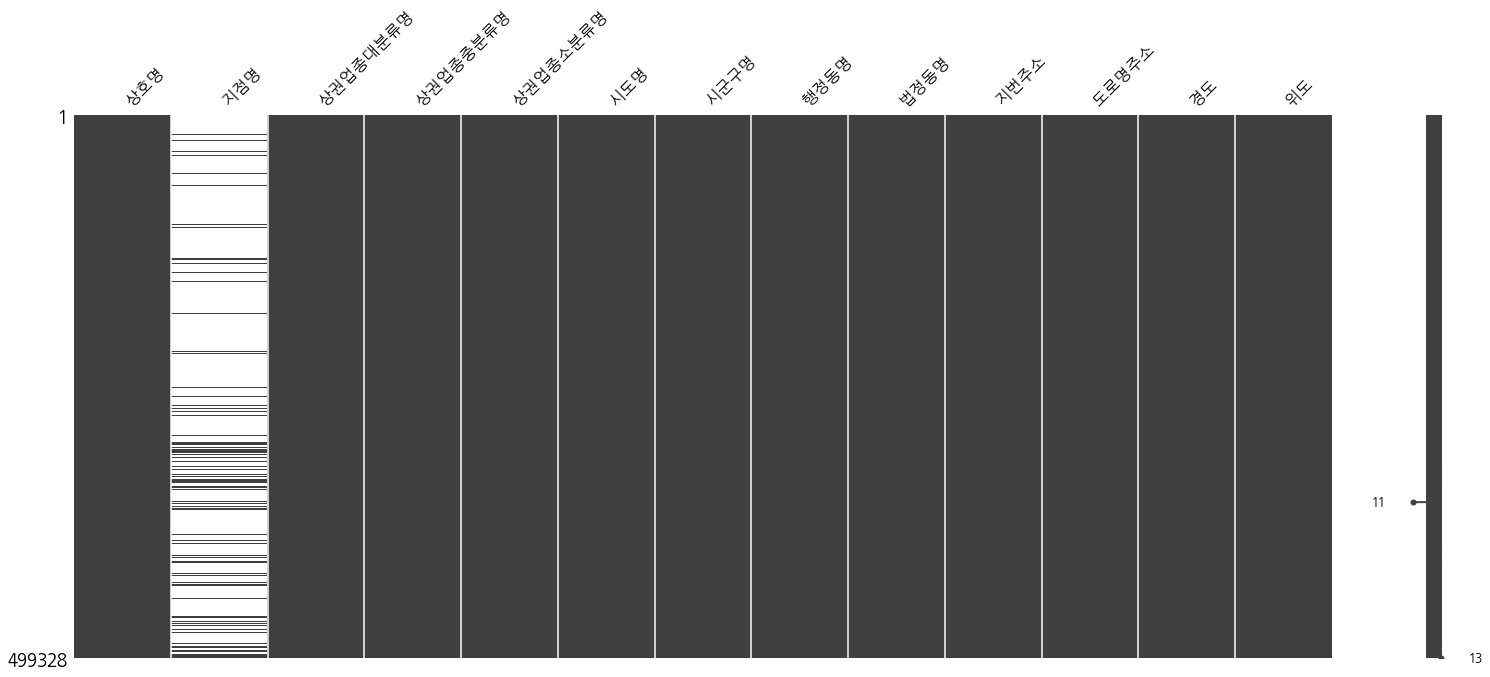

In [19]:
msno.matrix(shop_2018_06[view_columns])

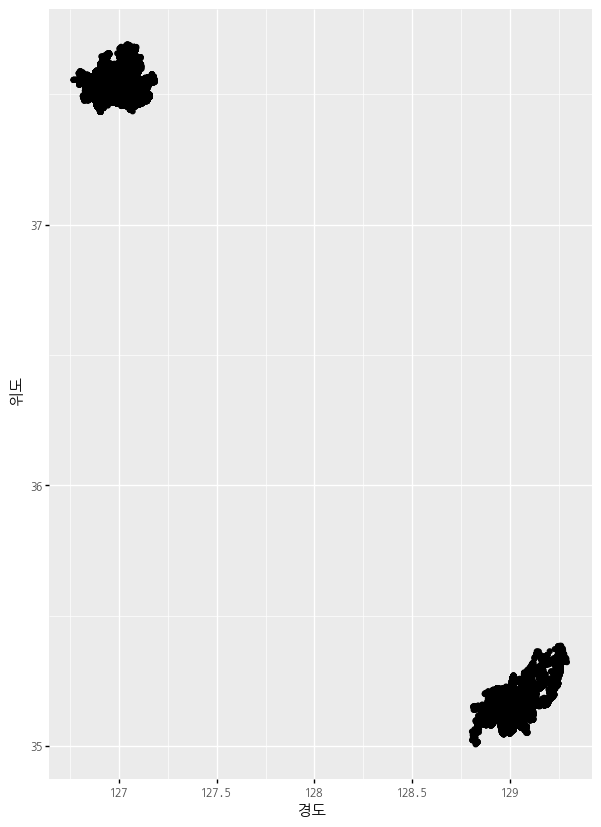

<ggplot: (-9223371909750190788)>

In [24]:
ggplot(shop_2018_06, aes(x='경도', y='위도')) \
    + geom_point() \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(7, 10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

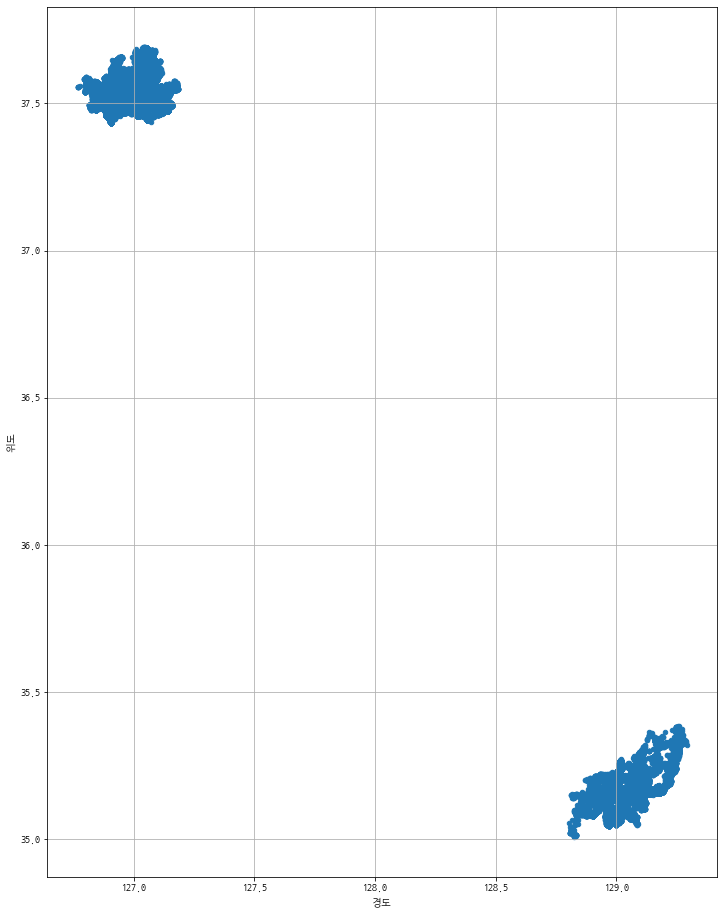

In [25]:
shop_2018_06.plot.scatter(x='경도', y='위도', grid=True, figsize=(12, 16))

In [28]:
# 데이터를 시각화 시켜보니 서울과 부산만 있는것 같다. => 그래서 서울과 그 이외의 데이터로 나눈다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]
shop_seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
5,19975850,허술한집,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,...,1150010800100450031005883,NaN,서울특별시 강서구 공항대로3길 9,157812,7619.0,NaN,1,NaN,126.809957,37.562013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499323,16141434,배스킨라빈스31,건대스타시티점,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,...,1121510500102270007022407,더샵스타시티,서울특별시 광진구 아차산로 262,143730,5065.0,NaN,NaN,NaN,127.072944,37.536997
499324,16093390,본도시락,본설렁탕,Q,음식,Q01,한식,Q01A09,설렁탕집,I56111,...,1174010900105020000000001,강동타워,서울특별시 강동구 상일로6길 39,134100,5288.0,NaN,NaN,NaN,127.175331,37.549794
499325,16093078,체크페이먼트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010600109050000028207,성아빌딩,서울특별시 강남구 역삼로69길 10,135841,6196.0,NaN,NaN,NaN,127.054001,37.502210
499326,16093122,마젠타네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1144010200104630000002585,마포현대하이엘,서울특별시 마포구 마포대로 173,121862,4130.0,NaN,1,NaN,126.954442,37.549892


In [29]:
# '~'는 ~가 아닌것을 의미한다.
shop_except_seoul = shop_2018_06.loc[~shop_2018_06['도로명주소'].str.startswith('서울')]
shop_except_seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
22,20047434,경부할인마트,NaN,D,소매,D03,종합소매점,D03A06,종합소매,G47190,...,2617010100107940681015812,NaN,부산광역시 동구 망양로 593,601831,48716.0,NaN,1,NaN,129.034599,35.123196
23,20037352,마니쩜,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,2623011000104500002043836,가남아파트,부산광역시 부산진구 대학로 64-1,614010,47336.0,NaN,2,NaN,129.034302,35.150069
24,20038373,경주아구찜,NaN,Q,음식,Q03,일식/수산물,Q03A06,아구전문,I56111,...,2650010500103570010019103,NaN,부산광역시 수영구 수영로 381-8,613010,48318.0,NaN,1,NaN,129.106330,35.141176
30,20031733,동해제일산오징어,NaN,Q,음식,Q03,일식/수산물,Q03A13,낙지/오징어,I56111,...,2626010800113800002003460,NaN,부산광역시 동래구 아시아드대로220번길 30,607060,47838.0,NaN,1,NaN,129.068324,35.202902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499305,16179461,보라헤어,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,2653010600100030016028432,엘지신주례아파트상가,부산광역시 사상구 백양대로342번길 22,617762,46997.0,NaN,NaN,NaN,129.014460,35.154509
499310,16167626,호텔엘레펀트,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2623010300105190036031562,NaN,부산광역시 부산진구 중앙대로691번가길 24-12,614847,47287.0,NaN,NaN,NaN,129.056079,35.155344
499311,16180649,포항물회,7.7,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2620010100101060003011425,NaN,부산광역시 영도구 절영로36번길 14-1,606011,49045.0,NaN,NaN,1,129.038401,35.091686
499318,16163228,참누리,NaN,F,생활서비스,F02,세탁/가사서비스,F02A05,청소/소독,NaN,...,2635010700113750000007148,경남아너스빌아파트,부산광역시 해운대구 좌동순환로99번길 22,612750,48080.0,NaN,NaN,NaN,129.166905,35.177375


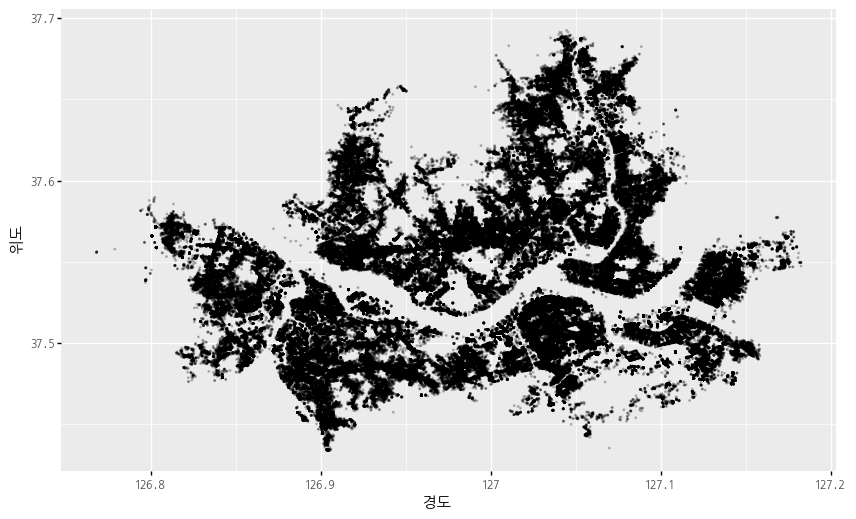

<ggplot: (-9223371909535299640)>

In [31]:
ggplot(shop_seoul, aes(x='경도', y='위도')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

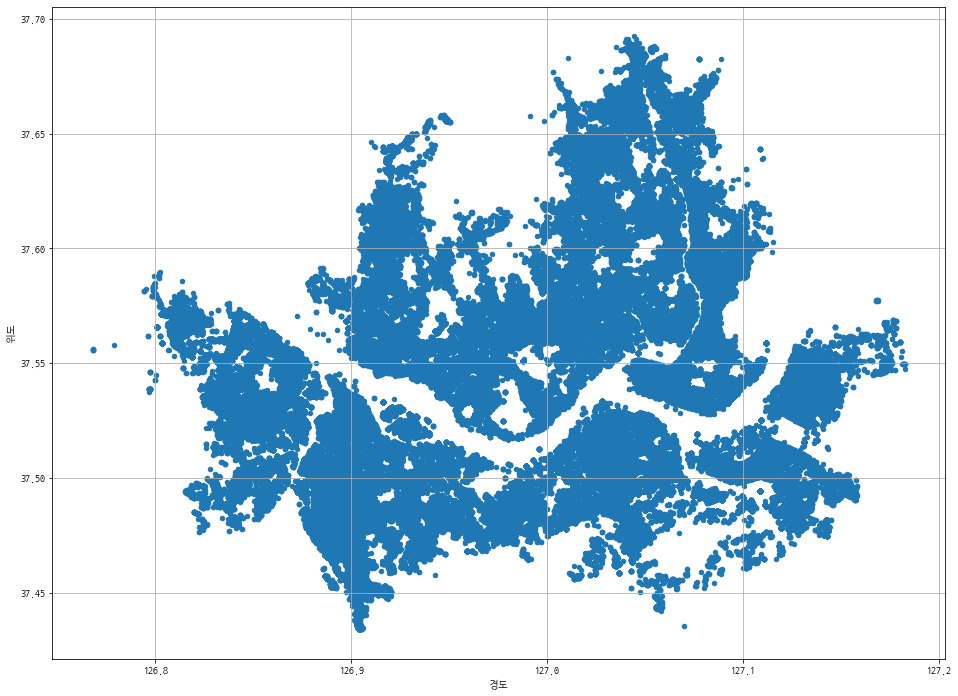

In [33]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True, figsize=(16, 12))

In [43]:
# 데이터프레임의 도로명주소를 활용해서 '시도', '구군' 열을 만든다.
# str.split() 메소드에 expend=True 옵션을 지정해서 구분자를 경계로 문자열을 서로 다른 열(데이터프레임)으로 구분해서 '시도'
# 열과 '구군' 열을 만든다.
# print(type(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)))
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[0])
# print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[1])

shop_2018_06['시도'] = shop_seoul['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_06['구군'] = shop_seoul['도로명주소'].str.split(' ', expand=True)[1]
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [44]:
# '시도' 열과 '구군' 열이 추가된 원본 데이터프레임엣 서울만 추출해 서울 데이터프레임을 다시 만들어 준다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]

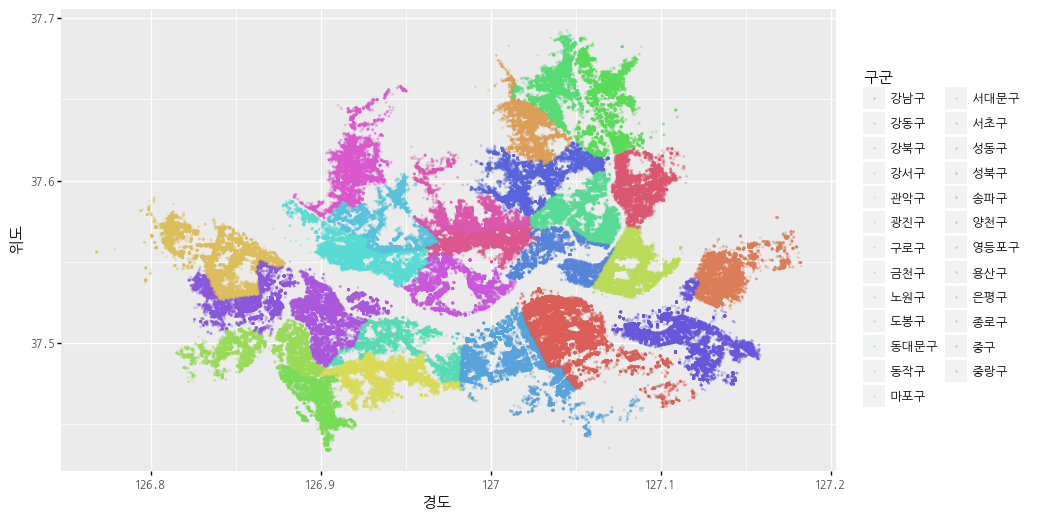

<ggplot: (127107082837)>

In [46]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='구군')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

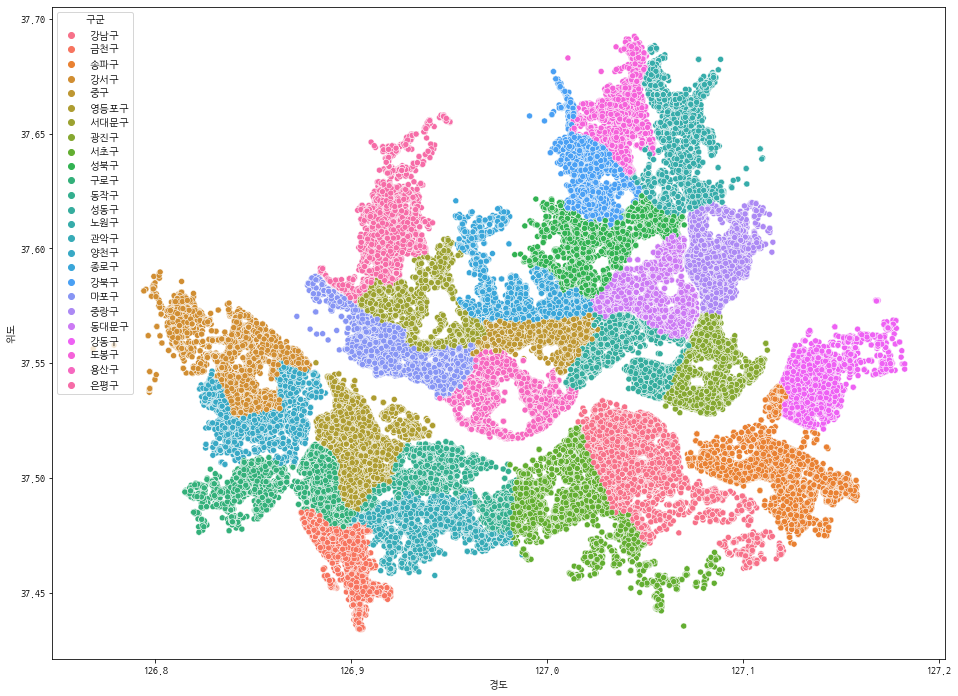

In [50]:
# seaboen 라이브러리를 이용한 시각화
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='구군')

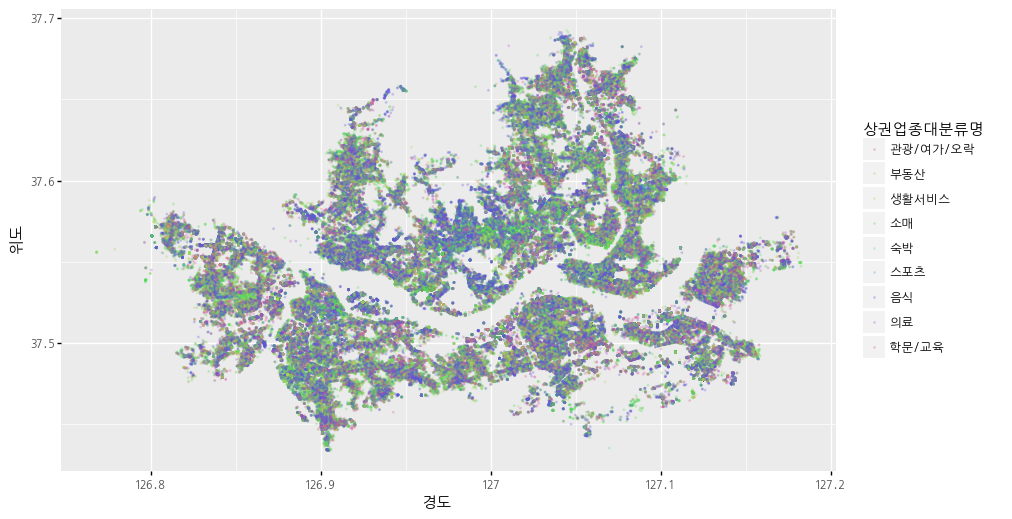

<ggplot: (127104951798)>

In [52]:
ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6)) \
    + scale_fill_gradient(low='blue', high='green')

<AxesSubplot:xlabel='경도', ylabel='위도'>

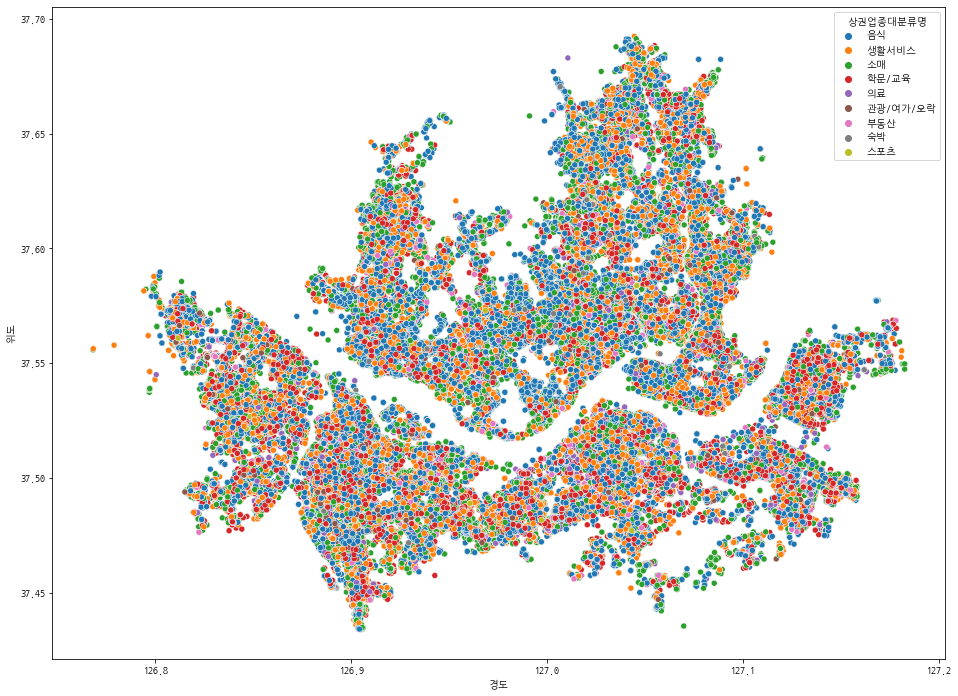

In [53]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='상권업종대분류명')

In [55]:
# 학문/교육과 관련된 정보 보기
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']
shop_seoul_edu.shape

(27717, 41)

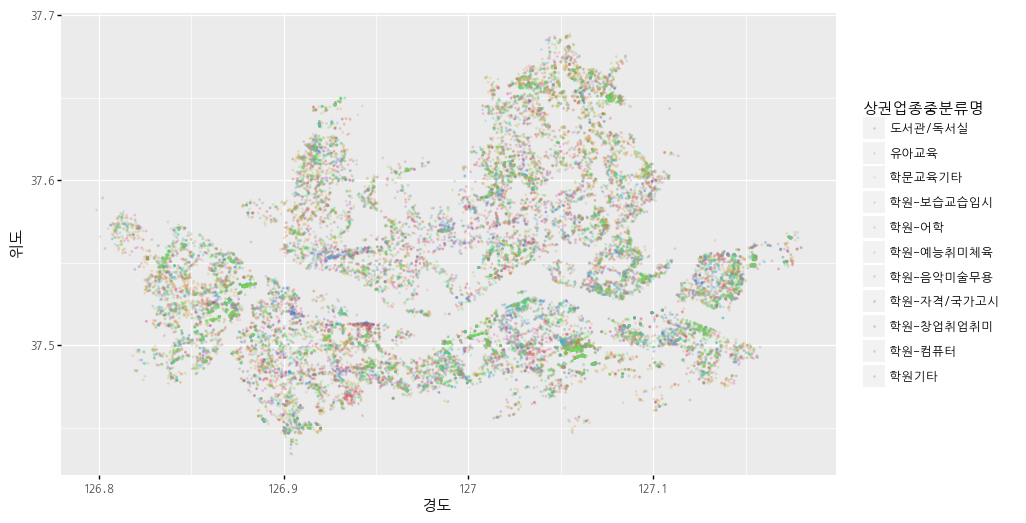

<ggplot: (-9223371909732652414)>

In [57]:
ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명')) \
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

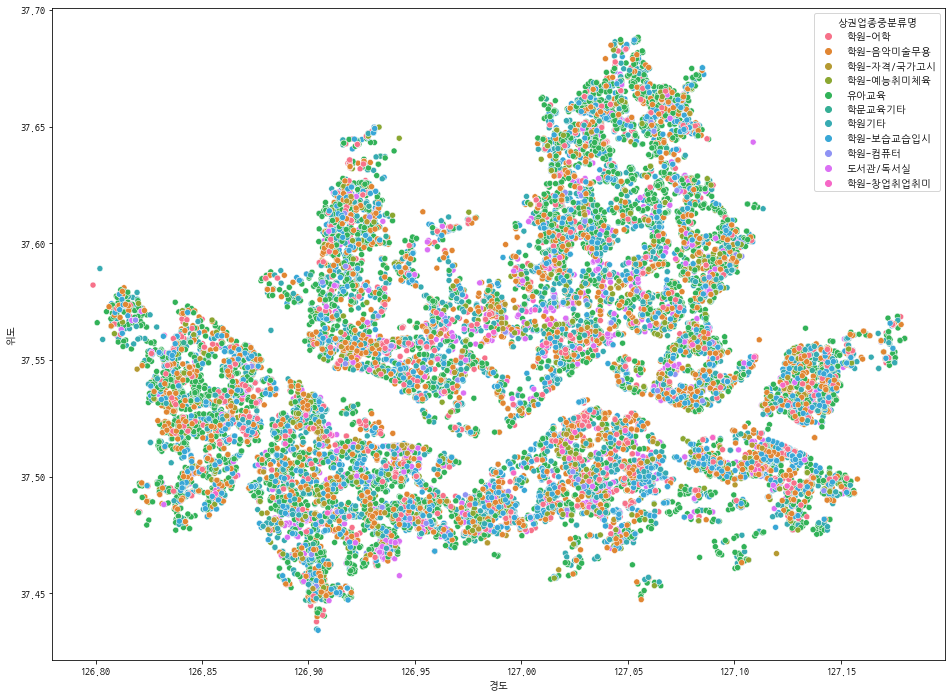

In [58]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명')